In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
#read values from excel
train_data = pd.read_excel('/content/drive/MyDrive/Asssignment4_Data.xlsx', sheet_name='Train',header=0).to_numpy()
test_data = pd.read_excel('/content/drive/MyDrive/Asssignment4_Data.xlsx', sheet_name='Test',header=0).to_numpy()

In [4]:
#Get the trainign and test data and corresponding labels
x_train = train_data[:,1:-1]
y_train = train_data[:,-1]
x_test = test_data[:,1:-1]
y_test = test_data[:,-1]

In [6]:
rowtr = x_train.shape[0]
coltr = x_train.shape[1]
rowtst = x_test.shape[0]
coltst = x_test.shape[1]

In [7]:
num_of_labels = 3
accuracy = np.zeros(rowtr)

for k in range(rowtr):
  #initialize vectors
  dist = np.zeros(rowtr)
  predicted_label = ["" for x in range(rowtst)]

  for i in range(rowtst):
    #calculate Eucleadian distances
    for j in range(rowtr):
      dist[j] = np.sqrt(np.sum((x_test[i,:] - x_train[j,:])**2))
    
    #sort the arguments
    sorted_dist_arg = np.argsort(dist)

    #initialize votes
    vote = np.zeros(num_of_labels) #0 for apartment, 1 for Condo and 2 for house

    #take votes from sorted list
    for c in range(k):
      predict = y_train[sorted_dist_arg[c]]
      if(predict == 'Apartment'):
        vote[0] = vote[0] + 1
      elif(predict == 'Condo'):
        vote[1] = vote[1] + 1
      else:
        vote[2] = vote[2] + 1

    #Get the maximum votes
    predicted_label_number= np.argmax(vote)

    #Convert to predicted labels
    if(predicted_label_number == 0):
      predicted_label[i] = 'Apartment'
    elif(predicted_label_number == 1):
      predicted_label[i] = 'Condo'
    else:
      predicted_label[i] = 'House'

  #Calculate accuracy for the test data
  total_count = rowtst
  correct_count = 0;

  for a in range(rowtst):
    if(predicted_label[a]==y_test[a]):
      correct_count = correct_count + 1
  accuracy[k] = correct_count/total_count * 100   

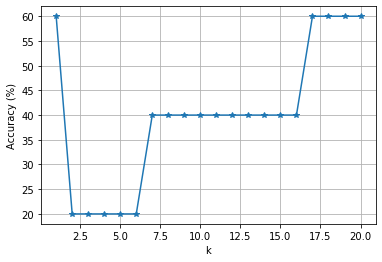

In [8]:
x = list(range(1,rowtr+1))
plt.plot(x,accuracy,'-*')
plt.xlabel("k")
plt.ylabel("Accuracy (%)")#
plt.grid()
plt.show()

## Report

We cannot take k = 1 as that means considering every point as a cluster and it takes so much time. We observe that the accuracy using k value is low from 2 to 16. But the highest accuracy is obtained at k = 17. After that it does not change much. So, the optimal k value would be 17. The highest accuracy is 60%.